In [110]:
print("Hello World")

Hello World


In [131]:
import numpy as np
import pandas as pd

In [112]:
df=pd.read_csv("placement.csv")

In [113]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [114]:
df.shape


(100, 4)

In [115]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


# Preprocessing (Data cleaning)

In [116]:
df=df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# EDA

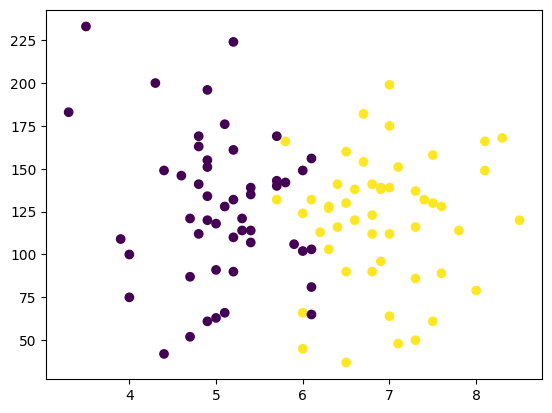

In [117]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

# Extract input output columns

In [118]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [119]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [120]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train test spil

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [122]:
print(x_train)
print(y_train)

    cgpa     iq
26   7.0  199.0
4    5.8  142.0
44   7.5   61.0
90   7.3   86.0
15   5.1  176.0
..   ...    ...
67   5.0  118.0
56   6.1   65.0
96   4.4   42.0
19   5.2  132.0
33   6.0  149.0

[90 rows x 2 columns]
26    1
4     0
44    1
90    1
15    0
     ..
67    0
56    0
96    0
19    0
33    0
Name: placement, Length: 90, dtype: int64


# Scalling

In [123]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_train

array([[ 0.91370308,  1.84144083],
       [-0.12942517,  0.41403203],
       [ 1.34833985, -1.61439101],
       [ 1.17448514, -0.98833452],
       [-0.73791665,  1.26546886],
       [-0.21635253,  0.43907429],
       [-0.21635253,  1.09017304],
       [ 1.60912191, -0.28715124],
       [ 0.56599366,  0.31386299],
       [ 0.3052116 ,  0.06344039],
       [ 1.4352672 ,  0.06344039],
       [ 2.21761339, -0.13689769],
       [-0.6509893 ,  0.88983496],
       [ 0.04442954, -0.03672865],
       [ 0.04442954, -2.01506716],
       [ 0.13135689, -1.11354581],
       [-0.21635253,  0.36394751],
       [ 0.47906631,  0.11352491],
       [-0.47713459, -0.28715124],
       [-0.91177136,  0.7395814 ],
       [-1.7810449 , -0.41236254],
       [ 0.65292101,  1.41572241],
       [-2.30260902,  1.44076467],
       [ 0.3052116 , -0.5626161 ],
       [-0.99869871,  0.93991948],
       [ 0.47906631,  0.8647927 ],
       [-0.91177136,  0.21369395],
       [-1.69411754, -1.26379937],
       [-2.12875432,

In [124]:
x_test=scalar.transform(x_test)
x_test

array([[ 0.56599366, -0.13689769],
       [ 0.13135689, -0.5626161 ],
       [ 1.86990397,  1.01504626],
       [ 1.26141249,  0.16360943],
       [-0.824844  , -1.56430649],
       [-0.47713459, -0.46244706],
       [-0.6509893 , -0.38732028],
       [ 0.39213895, -0.23706673],
       [ 0.91370308, -0.33723576],
       [ 0.47906631, -2.21540524]])

# Model training

In [125]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Prediction

In [126]:
predict_data=clf.predict(x_test)
predict_data

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [127]:
y_test

20    1
14    0
65    1
3     1
7     0
81    0
92    0
13    1
29    1
82    1
Name: placement, dtype: int64

In [128]:
from sklearn.metrics import accuracy_score
print("Your model's accuracy is ",accuracy_score(y_test,predict_data)*100, "%")

Your model's accuracy is  90.0 %


<Axes: >

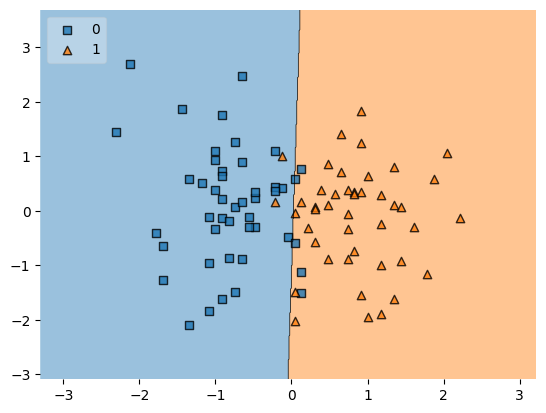

In [129]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

# Model export

In [130]:
import pickle
pickle.dump(clf,open("model.pkl",'wb'))